In [1]:
import os
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import re
from scipy.stats.mstats import gmean

In [4]:
# get input paths
test_set = "miplib3_1000_gurobi"
instance_fldr = os.path.join("test_sets", test_set)
results_fldr = os.path.join("results", test_set)
out_fldr = os.path.join("outputs", test_set)

## Check run failures

In [28]:
# running list of strings contained by different error codes
# last two are catchalls
err = {
    "walltime": [],
    "bad_alloc": [],
    "takeoffcuts": [],
    "solver is dual infeasible": [],
    "solver must be optimal": [],
    "segmentation fault": [],
    "no vpcs were made from a new disjunction": [],
    "farkas": [],
    "prlp is primal infeasible": [],  # put outstanding bugs below here
    "must have primalbound > root lp objective": [],
    "objective at parent node": [],
    "failed to optimize mip": [],
    "disjunction does not represent a full binary tree": [],
    "nonbasic reduced cost should be": [],
    "solver not proven optimal for node": [],
    "unable to open": [],
    "warning": []
}

# runs that errored out with new error code
other = []

# runs that had no errors
empty = []

# series that didn't run
no_go = []

# counts
count_series = 0
count_instances = 0

# iterate over all expected runs
for instance in os.listdir(instance_fldr):
    if not os.path.isdir(os.path.join(instance_fldr, instance)):
        continue
    for perturbation in os.listdir(os.path.join(instance_fldr, instance)):
        if not os.path.isdir(os.path.join(instance_fldr, instance, perturbation)):
            continue
        for terms in [4, 16, 64]:
            for generator in ["None", "New", "Old", "Farkas"]:

                # set variables for this iteration
                count_series += 1
                stem = f"{instance}_{perturbation}_{terms}_{generator}"
                file_pth = os.path.join(results_fldr, f"{stem}.err")
                series_fldr = os.path.join(instance_fldr, instance, perturbation)
                count_instances += len([f for f in os.listdir(series_fldr) if
                                        f.endswith(".mps")])

                # check if the series wasn't run
                if not os.path.exists(file_pth):
                    no_go.append(stem)
                
                # check if the series ran with no errors or warnings
                elif os.path.getsize(file_pth) == 0:
                    empty.append(stem)
                
                # track which error codes were thrown
                else:
                    # read the file
                    with open(file_pth, "r") as f:
                        text = f.read().lower()
                    
                    # assign the error file to the appropriate list
                    for code in err:
                        if code in text:
                            err[code].append(stem)
                            break
                    else:
                        other.append(stem)

In [6]:
# check which series didn't run
print(no_go)

[]


In [7]:
# get the proportion of series that at least got started
1 - (len(no_go) / count_series)

1.0

In [8]:
# out of time - rerun with more time if a lot of these
err["walltime"]

[]

In [9]:
# out of memory - rerun with more memory if a lot of these
err["bad_alloc"]

[]

In [10]:
# this is an issue with John's bookkeeping - not much we can do here
err["takeoffcuts"]

[]

In [11]:
err["solver is dual infeasible"]

[]

In [12]:
# these are usually issues with CLP finding optimality - not much we can do here
err["solver must be optimal"]

[]

In [13]:
err["segmentation fault"]

[]

In [14]:
# these should all be from the problem being too big and hitting the time limit
# or integer solutions
# len(err["no vpcs were made from a new disjunction"]) / count_series  15%
err["no vpcs were made from a new disjunction"]

[]

In [15]:
# this may be a bug in my code - track down if a lot
err["farkas"]

[]

In [16]:
# this shouldn't be an issue - effected runs just get skipped
err["prlp is primal infeasible"]

['stein45_rhs_1_16_New',
 'stein45_rhs_1_16_Old',
 'stein45_rhs_1_16_Farkas',
 'stein45_matrix_1_16_New',
 'stein45_matrix_1_16_Old',
 'stein45_matrix_1_16_Farkas',
 'p0548_objective_1_4_New',
 'p0548_objective_1_4_Old',
 'p0548_objective_1_4_Farkas',
 'p0548_objective_1_16_New',
 'p0548_objective_1_16_Old',
 'p0548_objective_1_16_Farkas',
 'p0548_objective_1_64_New',
 'p0548_objective_1_64_Old',
 'p0548_objective_1_64_Farkas',
 'p0548_matrix_1_4_New',
 'p0548_matrix_1_4_Old',
 'p0548_matrix_1_4_Farkas',
 'p0548_matrix_1_16_New',
 'p0548_matrix_1_16_Old',
 'p0548_matrix_1_16_Farkas',
 'p0548_matrix_1_64_New',
 'p0548_matrix_1_64_Old',
 'p0548_matrix_1_64_Farkas',
 'p0548_matrix_0_4_New',
 'p0548_matrix_0_4_Old',
 'p0548_matrix_0_4_Farkas',
 'p0548_matrix_0_16_New',
 'p0548_matrix_0_16_Old',
 'p0548_matrix_0_16_Farkas',
 'p0548_matrix_0_64_New',
 'p0548_matrix_0_64_Old',
 'p0548_matrix_0_64_Farkas',
 'p0548_objective_0_4_New',
 'p0548_objective_0_4_Old',
 'p0548_objective_0_4_Farkas',
 

In [17]:
err["warning"]

['rout_matrix_1_64_New',
 'rout_matrix_1_64_Old',
 'rout_matrix_1_64_Farkas',
 'rout_matrix_0_64_New',
 'rout_matrix_0_64_Old',
 'rout_matrix_0_64_Farkas',
 'rout_matrix_-1_64_New',
 'rout_matrix_-1_64_Old',
 'rout_matrix_-1_64_Farkas',
 'p0033_rhs_0_64_New',
 'p0033_rhs_0_64_Old',
 'p0033_rhs_0_64_Farkas',
 'p0033_rhs_1_64_New',
 'p0033_rhs_1_64_Old',
 'p0033_rhs_1_64_Farkas',
 'p0033_objective_1_64_New',
 'p0033_objective_1_64_Old',
 'p0033_objective_1_64_Farkas',
 'p0033_matrix_1_64_New',
 'p0033_matrix_1_64_Old',
 'p0033_matrix_1_64_Farkas',
 'p0033_matrix_0_64_New',
 'p0033_matrix_0_64_Old',
 'p0033_matrix_0_64_Farkas',
 'p0033_objective_0_64_New',
 'p0033_objective_0_64_Old',
 'p0033_objective_0_64_Farkas',
 'p0033_rhs_-1_64_New',
 'p0033_rhs_-1_64_Old',
 'p0033_rhs_-1_64_Farkas',
 'p0033_matrix_-1_64_New',
 'p0033_matrix_-1_64_Old',
 'p0033_matrix_-1_64_Farkas',
 'p0033_objective_-1_64_New',
 'p0033_objective_-1_64_Old',
 'p0033_objective_-1_64_Farkas']

In [18]:
# issue was not optimizing solver before checking LP relaxation objective vs primal bound
err["must have primalbound > root lp objective"]

[]

In [19]:
# LP relxation objective is not going to match root node objective when warm starting 
err["objective at parent node"]

[]

In [20]:
# not enough tolerance added to bound (or we hit time limit)
# todo handle this gracefully
# len(err["failed to optimize mip"]) / count_series  10%
err["failed to optimize mip"]

[]

In [21]:
# todo: figure out why
# len(err["disjunction does not represent a full binary tree"]) / count_series  6%
err["disjunction does not represent a full binary tree"]

['blend2_rhs_0_64_New',
 'blend2_rhs_0_64_Old',
 'blend2_rhs_0_64_Farkas',
 'blend2_objective_1_64_New',
 'blend2_objective_1_64_Old',
 'blend2_objective_1_64_Farkas',
 'blend2_matrix_1_64_New',
 'blend2_matrix_1_64_Old',
 'blend2_matrix_1_64_Farkas',
 'blend2_matrix_0_64_New',
 'blend2_matrix_0_64_Old',
 'blend2_matrix_0_64_Farkas',
 'blend2_rhs_-1_64_New',
 'blend2_rhs_-1_64_Old',
 'blend2_rhs_-1_64_Farkas',
 'blend2_matrix_-1_64_New',
 'blend2_matrix_-1_64_Old',
 'blend2_matrix_-1_64_Farkas',
 'gen_objective_1_16_New',
 'gen_objective_1_16_Old',
 'gen_objective_1_16_Farkas',
 'gen_objective_1_64_New',
 'gen_objective_1_64_Old',
 'gen_objective_1_64_Farkas',
 'gen_objective_0_16_New',
 'gen_objective_0_16_Old',
 'gen_objective_0_16_Farkas',
 'gen_objective_0_64_New',
 'gen_objective_0_64_Old',
 'gen_objective_0_64_Farkas',
 'gen_objective_-1_16_New',
 'gen_objective_-1_16_Old',
 'gen_objective_-1_16_Farkas',
 'gen_objective_-1_64_New',
 'gen_objective_-1_64_Old',
 'gen_objective_-1_6

In [22]:
# this and next issue I think are because we run out of time creating tree leading to errors
# todo: handle gracefully 
err["nonbasic reduced cost should be"]

[]

In [23]:
# again issue with not getting through vpc generation in time
# todo: handle this gracefully
err["solver not proven optimal for node"]

[]

In [29]:
err["unable to open"]

['blend2_rhs_0_4_None',
 'blend2_rhs_0_4_New',
 'blend2_rhs_0_4_Old',
 'blend2_rhs_0_4_Farkas',
 'blend2_rhs_0_16_None',
 'blend2_rhs_0_16_New',
 'blend2_rhs_0_16_Old',
 'blend2_rhs_0_16_Farkas',
 'blend2_rhs_0_64_None',
 'blend2_objective_1_4_None',
 'blend2_objective_1_4_New',
 'blend2_objective_1_4_Old',
 'blend2_objective_1_4_Farkas',
 'blend2_objective_1_16_None',
 'blend2_objective_1_16_New',
 'blend2_objective_1_16_Old',
 'blend2_objective_1_16_Farkas',
 'blend2_objective_1_64_None',
 'blend2_matrix_1_4_None',
 'blend2_matrix_1_4_New',
 'blend2_matrix_1_4_Old',
 'blend2_matrix_1_4_Farkas',
 'blend2_matrix_1_16_None',
 'blend2_matrix_1_16_New',
 'blend2_matrix_1_16_Old',
 'blend2_matrix_1_16_Farkas',
 'blend2_matrix_1_64_None',
 'blend2_matrix_0_4_None',
 'blend2_matrix_0_4_New',
 'blend2_matrix_0_4_Old',
 'blend2_matrix_0_4_Farkas',
 'blend2_matrix_0_16_None',
 'blend2_matrix_0_16_New',
 'blend2_matrix_0_16_Old',
 'blend2_matrix_0_16_Farkas',
 'blend2_matrix_0_64_None',
 'blend2

In [30]:
# errors unaccounted for
other

[]

In [24]:
# proportion of series that had no critical issues
len(empty + err["warning"] + err["prlp is primal infeasible"] + err["walltime"]) / count_series

0.6916167664670658

In [25]:
# proportion of series that had no critical issues/issues we can't control
for generator in ["None", "New", "Old", "Farkas"]:
    g = [s for s in empty + err["warning"] + err["prlp is primal infeasible"] +
         err["walltime"] + err["bad_alloc"] + err["solver not proven optimal for node"] +
         err["nonbasic reduced cost should be"] + err["solver must be optimal"] +
         err["takeoffcuts"] + err["no vpcs were made from a new disjunction"]
         if s.endswith(generator)]
    print(f"{generator}: {4 * len(g) / count_series}")

None: 0.9640718562874252
New: 0.7944111776447106
Old: 0.8642714570858283
Farkas: 0.8642714570858283


In [26]:
# proportion of series that were improperly provisioned
(len(err["bad_alloc"] + err["walltime"])) / count_series

0.0374251497005988

## Read in data

In [27]:
# map generator names to the corresponding data frames
df_map = {
    "None": pd.DataFrame(),
    "Farkas": pd.DataFrame(),
    "New": pd.DataFrame(),
    "Old": pd.DataFrame()
}
gap_map = {
    "None": pd.DataFrame(),
    "Farkas": pd.DataFrame(),
    "New": pd.DataFrame(),
    "Old": pd.DataFrame()
}
regex = re.compile(r'([a-zA-Z0-9-]+)_([a-z]+)_([0-9-]+)_([0-9]+)_([a-zA-Z ]+)')

# declaring types as needed
column_types = {'primalBound': float}

# iterate over all files in the folder
for file_name in os.listdir(results_fldr):
    
    file_pth = os.path.join(results_fldr, file_name)
    
    # if the file is not a nonempty csv, skip it
    if not file_name.endswith(".csv") or os.path.getsize(file_pth) == 0:
        continue
    
    # get the experimental set up
    match = regex.search(file_name)
    instance_name = match.group(1)
    perturbation = match.group(2)
    degree = 2**int(match.group(3))
    terms = int(match.group(4))
    generator = match.group(5)
    
    # read the file
    df = pd.read_csv(file_pth, keep_default_na=False, dtype=column_types)
    
    # add some identifying columns
    df["instance"] = instance_name
    df["perturbation"] = perturbation
    df["degree"] = degree
    df["terms"] = terms
    
    # append to the appropriate data frame
    df_map[generator] = pd.concat([df_map[generator], df])

In [28]:
# get proportion of instances run
for generator, df in df_map.items():
    print(f"{generator}: {4 * len(df) / count_instances}")

None: 0.9638157894736842
Farkas: 0.6642543859649123
New: 0.6239035087719298
Old: 0.5907894736842105


In [29]:
gen = "Farkas" # make sure masks 3 and 9 are fixed rest should be fine
masks = {
        0: -1e20 > df_map[gen]["lpBound"],
        1: df_map[gen]["lpBound"] - 1e-4 > df_map[gen]["lpBoundPostVpc"],
        2: df_map[gen]["lpBoundPostVpc"] - 1e-4 > df_map[gen]["disjunctiveDualBound"],
        3: df_map[gen]["lpBoundPostVpc"] - 1e-4 > df_map[gen]["rootDualBound"],
        4: df_map[gen]["rootDualBound"] - 1e-4 > df_map[gen]["dualBound"],
        5: df_map[gen]["dualBound"] - 1e-4 > df_map[gen]["primalBound"],
        6: df_map[gen]["primalBound"] > 1e20,
        7: 0 > df_map[gen]["vpcGenerationTime"],
        8: df_map[gen]["vpcGenerationTime"] - 1e-4 > df_map[gen]["rootDualBoundTime"],
        9: df_map[gen]["rootDualBoundTime"] - 1e-4 > df_map[gen]["terminationTime"],
        10: df_map[gen]["vpcGenerationTime"] - 1e-4 > df_map[gen]["bestSolutionTime"],
        11: df_map[gen]["bestSolutionTime"] - 1e-4 > df_map[gen]["terminationTime"],
        12: df_map[gen]["terminationTime"] > df_map[gen]["maxTime"] + 20
    }

df_map[gen][masks[0]]

,instanceIndex,vpcGenerator,terms,lpBound,disjunctiveDualBound,lpBoundPostVpc,rootDualBound,dualBound,primalBound,vpcGenerationTime,...,nodes,iterations,maxTime,actualTerms,numCuts,mipSolver,providePrimalBound,instance,perturbation,degree


In [30]:
for gen in df_map:
    mask = (-1e20 > df_map[gen]["lpBound"]) | \
        (df_map[gen]["lpBound"] - 1e-4 > df_map[gen]["lpBoundPostVpc"]) | \
        (df_map[gen]["lpBoundPostVpc"] - 1e-4 > df_map[gen]["disjunctiveDualBound"]) | \
        (df_map[gen]["lpBoundPostVpc"] - 1e-4 > df_map[gen]["rootDualBound"]) | \
        (df_map[gen]["rootDualBound"] - 1e-4 > df_map[gen]["dualBound"]) | \
        (df_map[gen]["dualBound"] - 1e-4 > df_map[gen]["primalBound"]) | \
        (df_map[gen]["primalBound"] > 1e20) | \
        (0 > df_map[gen]["vpcGenerationTime"]) | \
        (df_map[gen]["vpcGenerationTime"] - 1e-4 > df_map[gen]["rootDualBoundTime"]) | \
        (df_map[gen]["rootDualBoundTime"] - 1e-4 > df_map[gen]["terminationTime"]) | \
        (df_map[gen]["vpcGenerationTime"] - 1e-4 > df_map[gen]["bestSolutionTime"]) | \
        (df_map[gen]["bestSolutionTime"] - 1e-4 > df_map[gen]["terminationTime"]) | \
        (df_map[gen]["terminationTime"] > df_map[gen]["maxTime"] + 20)
    df_map[gen] = df_map[gen][~mask]

In [31]:
# merge the 4 different data frames into one
join_cols = ["instance", "perturbation", "degree", "terms", "instanceIndex"]
df = df_map["None"].merge(df_map["New"], on=join_cols,
                                suffixes=(" None", None))
df = df.merge(df_map["Old"], on=join_cols,
                          suffixes=(" New", None))
df = df.merge(df_map["Farkas"], on=join_cols,
                          suffixes=(" Old", " Farkas"))
df

,instanceIndex,vpcGenerator None,terms,lpBound None,disjunctiveDualBound None,lpBoundPostVpc None,rootDualBound None,dualBound None,primalBound None,vpcGenerationTime None,...,rootDualBoundTime Farkas,bestSolutionTime Farkas,terminationTime Farkas,nodes Farkas,iterations Farkas,maxTime Farkas,actualTerms Farkas,numCuts Farkas,mipSolver Farkas,providePrimalBound Farkas
0,0,None,64,290.931073,290.931073,290.931073,299.344971,307.000000,307.000000,0.013297,...,21.375267,22.751267,22.755267,278,2052,300.0,65,5,CBC,1
1,1,None,64,283.264952,283.264952,283.264952,296.219003,305.271695,307.000000,0.001246,...,3.007775,300.111775,300.159775,62684,267387,300.0,65,5,CBC,1
2,2,None,64,283.498884,283.498884,283.498884,298.134441,305.000000,305.000000,0.003059,...,3.109592,68.565592,68.609592,15138,80137,300.0,65,5,CBC,1
3,0,None,4,834.682353,834.682353,834.682353,1042.335836,1120.000000,1120.000000,0.011974,...,1.659606,4.007606,4.007606,1084,4593,300.0,5,4,CBC,1
4,1,None,4,831.045813,831.045813,831.045813,1001.477627,1004.000000,1004.000000,0.000718,...,0.533546,1.909546,1.917546,898,3113,300.0,5,4,CBC,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2292,6,None,64,45254.186094,45254.186094,45254.186094,45296.718243,45615.308050,46734.019341,0.001339,...,1.060923,300.364923,300.368923,74853,443726,300.0,65,11,CBC,1
2293,7,None,64,38894.013127,38894.013127,38894.013127,38977.921549,39348.251983,40005.054142,0.001669,...,0.717392,300.301392,300.305392,50306,297038,300.0,65,11,CBC,1
2294,8,None,64,38893.869778,38893.869778,38893.869778,38977.281924,39369.412667,40006.054142,0.001338,...,0.691971,300.263971,300.267971,47586,285846,300.0,65,11,CBC,1
2295,9,None,64,38894.169260,38894.169260,38894.169260,38976.438773,39345.276782,40562.054142,0.001352,...,0.702323,300.230323,300.234323,44677,262492,300.0,65,11,CBC,1


In [32]:
# get proportion of tests run successfully
4 * len(df) / count_instances

0.5037280701754386

In [33]:
def gap_closed(df, col):
    gap = (df[col] - df["lpBound None"]) / (df['primalBound None'] - df["lpBound None"])
    gap[(gap < 0) | (gap > 1)] = np.nan
    return gap

In [34]:
# find the optimality gap closed by each generator
df["Disjunction (New)"] = gap_closed(df, "disjunctiveDualBound New")
df["Disjunction (Old)"] = gap_closed(df, "disjunctiveDualBound Old")
df["VPCs (New)"] = gap_closed(df, "lpBoundPostVpc New")
df["VPCs (Old)"] = gap_closed(df, "lpBoundPostVpc Old")
df["VPCs (Farkas)"] = gap_closed(df, "lpBoundPostVpc Farkas")
df["Root Cuts (None)"] = gap_closed(df, "rootDualBound None")
df["Root Cuts (New)"] = gap_closed(df, "rootDualBound New")
df["Root Cuts (Old)"] = gap_closed(df, "rootDualBound Old")
df["Root Cuts (Farkas)"] = gap_closed(df, "rootDualBound Farkas")
df = df.dropna()

In [35]:
# set aside core columns and filter for all subsequent dataframes
group_cols = ["instance", "perturbation", "degree", "terms"]
id_cols = ["instanceIndex"]
mask = (df["instanceIndex"] > 0) & (df["Disjunction (New)"] < .9999)

## Make bound table

In [36]:
# additional filtering for dataframe on bounds
fields = ["Disjunction (New)", "Disjunction (Old)", "VPCs (New)", "VPCs (Old)",
          "VPCs (Farkas)", "Root Cuts (None)", "Root Cuts (New)", "Root Cuts (Old)",
          "Root Cuts (Farkas)"]
bound_df = df.loc[mask, group_cols + id_cols + fields]
bound_df

,instance,perturbation,degree,terms,instanceIndex,Disjunction (New),Disjunction (Old),VPCs (New),VPCs (Old),VPCs (Farkas),Root Cuts (None),Root Cuts (New),Root Cuts (Old),Root Cuts (Farkas)
1,mod008,rhs,2.0,64,1,0.126361,0.122554,0.118291,0.110985,0.090483,0.545777,0.476620,0.526825,0.518345
2,mod008,rhs,2.0,64,2,0.154637,0.164308,0.139644,0.117716,0.127250,0.680688,0.703177,0.593576,0.651710
4,lseu,rhs,2.0,4,1,0.398930,0.398930,0.398930,0.398930,0.395298,0.985416,0.984443,0.985355,0.985416
6,p0033,rhs,2.0,4,1,0.505667,0.105332,0.490155,0.101199,0.101624,1.000000,1.000000,1.000000,1.000000
7,p0033,rhs,2.0,4,2,0.062967,0.068968,0.062967,0.035070,0.060110,0.878060,0.999999,0.878270,0.956116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2292,mas76,rhs,1.0,64,6,0.053406,0.008575,0.052954,0.007831,0.000000,0.028741,0.054706,0.029033,0.028741
2293,mas76,rhs,1.0,64,7,0.133032,0.133032,0.131185,0.131194,0.131210,0.075522,0.133664,0.132714,0.133706
2294,mas76,rhs,1.0,64,8,0.133062,0.133062,0.130457,0.130457,0.131047,0.074998,0.133554,0.132723,0.133461
2295,mas76,rhs,1.0,64,9,0.088797,0.088797,0.079461,0.079461,0.087375,0.049326,0.086172,0.086172,0.088989


In [37]:
aggregations = {f: "mean" for f in fields}
aggregations["instance"] = "nunique"
aggregations["instanceIndex"] = "count"

In [38]:
# get gap closed by degree and term
out = bound_df.groupby(["degree", "terms"]).agg(aggregations).reset_index()
out.to_csv(os.path.join(out_fldr, "bound_table.csv"), index=False, mode="w")
out

,degree,terms,Disjunction (New),Disjunction (Old),VPCs (New),VPCs (Old),VPCs (Farkas),Root Cuts (None),Root Cuts (New),Root Cuts (Old),Root Cuts (Farkas),instance,instanceIndex
0,0.5,4,0.132209,0.076702,0.073428,0.063670,0.053313,0.674576,0.669510,0.665008,0.671619,19,340
1,0.5,16,0.239844,0.189197,0.122748,0.125058,0.108274,0.665353,0.665145,0.659363,0.663861,18,304
2,0.5,64,0.306191,0.208588,0.138368,0.126972,0.080162,0.617867,0.630749,0.625846,0.622095,13,208
3,1.0,4,0.174904,0.078915,0.071813,0.059644,0.050718,0.674134,0.672592,0.665228,0.673627,20,281
4,1.0,16,0.280708,0.180754,0.116898,0.106764,0.093973,0.660867,0.657595,0.653945,0.660828,18,238
5,1.0,64,0.366905,0.194932,0.142912,0.111134,0.079326,0.628110,0.644861,0.637515,0.633110,14,163
6,2.0,4,0.235175,0.100925,0.081718,0.073091,0.052579,0.669061,0.676574,0.671979,0.672354,20,235
7,2.0,16,0.331352,0.182861,0.111291,0.113291,0.096842,0.676140,0.681398,0.680918,0.679268,17,194
8,2.0,64,0.436130,0.220119,0.153924,0.130094,0.102566,0.600223,0.633138,0.622088,0.618831,15,136


In [39]:
# now break it down by type of perturbation
bound_df.groupby(["degree", "terms", "perturbation"]).agg(aggregations)

Disjunction (New)  Disjunction (Old)  VPCs (New)  \
degree terms perturbation                                                     
0.5    4     matrix                 0.109838           0.071481    0.070244   
             objective              0.100270           0.089365    0.075653   
             rhs                    0.200005           0.064483    0.073638   
       16    matrix                 0.204124           0.156703    0.126974   
             objective              0.232907           0.247710    0.125048   
             rhs                    0.283747           0.145491    0.115645   
       64    matrix                 0.258312           0.195865    0.140906   
             objective              0.281919           0.250884    0.154524   
             rhs                    0.372421           0.180111    0.120801   
1.0    4     matrix                 0.091548           0.059630    0.061666   
             objective              0.131641           0.113614    0.095117   
             rhs                    0.353124           0.043956    0.044819   
       16    matrix                 0.200497           0.160168    0.121687   
             objective              0.257860           0.266716    0.140556   
             rhs                    0.410357           0.079821    0.076573   
       64    matrix                 0.251111           0.164830    0.175294   
             objective              0.348107           0.307153    0.175046   
             rhs                    0.488649           0.113581    0.082931   
2.0    4     matrix                 0.105762           0.057926    0.058267   
             objective              0.169133           0.151381    0.108919   
             rhs                    0.490180           0.035947    0.046936   
       16    matrix                 0.222131           0.154662    0.089434   
             objective              0.264185           0.275693    0.150531   
             rhs                    0.521475           0.059091    0.066681   
       64    matrix                 0.250587           0.173595    0.151940   
             objective              0.460500           0.401808    0.243708   
             rhs                    0.546124           0.089004    0.074186   

                           VPCs (Old)  VPCs (Farkas)  Root Cuts (None)  \
degree terms perturbation                                                
0.5    4     matrix          0.061869       0.042767          0.678085   
             objective       0.070598       0.062933          0.710523   
             rhs             0.055885       0.050877          0.620817   
       16    matrix          0.115694       0.093547          0.670521   
             objective       0.141620       0.152400          0.727411   
             rhs             0.112851       0.065748          0.580221   
       64    matrix          0.122409       0.075078          0.632728   
             objective       0.139942       0.105320          0.667591   
             rhs             0.118837       0.060980          0.557433   
1.0    4     matrix          0.048677       0.032170          0.657935   
             objective       0.082566       0.075207          0.711844   
             rhs             0.034328       0.032235          0.630174   
       16    matrix          0.105807       0.067344          0.691980   
             objective       0.145350       0.151360          0.683871   
             rhs             0.051519       0.042055          0.589912   
       64    matrix          0.121575       0.047404          0.652229   
             objective       0.152469       0.132664          0.637672   
             rhs             0.061908       0.056421          0.597303   
2.0    4     matrix          0.051942       0.033488          0.600668   
             objective       0.104828       0.074761          0.692434   
             rhs             0.026823       0.024185          0.683328   
       16    matrix          0.09

## Make Profiles

In [43]:
def make_plots(prof_df, metric, dim=3, show_all=False, perturbation=None):
    
    plt.rc('text', usetex=True)

    label = {
        "terminationTime": "Time",
        "nodes": "Nodes Processed",
        "iterations": "LP Iterations",
    }
    unit = {
        "terminationTime": "(seconds)",
        "nodes": "(1000 nodes)",
        "iterations": "(1000 iterations)",
    }

    # Create subplots for a 3x3 grid
    fig, axes = plt.subplots(dim, dim, figsize=(dim*4, dim*4))
    
    # Unique values in 'degree' and 'terms'
    unique_degrees = prof_df['degree'].sort_values(ascending=False).unique()  # sort increasing
    unique_terms = prof_df['terms'].sort_values().unique()  # sort decreasing
    
    if dim == 2:
        unique_degrees = unique_degrees[1:]
        unique_terms = unique_terms[1:]
    
    for i, degree in enumerate(unique_degrees):
        for j, terms in enumerate(unique_terms):
            ax = axes[i, j]
    
            # Filter the DataFrame based on 'degree' and 'terms'
            subset_df = prof_df[(prof_df['degree'] == degree) & (prof_df['terms'] == terms)]  
            
            # if we are looking at a specific perturbation, filter for it
            if perturbation is not None:
                subset_df = subset_df[subset_df["perturbation"] == perturbation]
            
            # get our data
            x = range(int(prof_df[[f"{metric} Farkas", f"{metric} None"]].max().max()) if
                      metric != "terminationTime" else 300)
            y_farkas = [(subset_df[f"{metric} Farkas"] < i).sum() / len(subset_df) for i in x]        
            y_none = [(subset_df[f"{metric} None"] < i).sum() / len(subset_df) for i in x]
            y_old = [(subset_df[f"{metric} New"] < i).sum() / len(subset_df) for i in x]        
            y_new = [(subset_df[f"{metric} Old"] < i).sum() / len(subset_df) for i in x]
            
            # make our plot
            ax.plot(x, y_none, label="Default")
            if show_all:
                ax.plot(x, y_old, label="Calc Disj, Calc Cuts")
                ax.plot(x, y_new, label="Param Disj, Calc Cuts")
            ax.plot(x, y_farkas, label="Param Disj, Param Cuts")
            
            # Highlight the region where Farkas VPCs have solved more instances than None
            fill_region = np.array([y_farkas[i] > y_none[i] for i in x])
            ax.fill_between(x, y_none, y_farkas, facecolor='yellow', alpha=0.3, where=fill_region, label="Improvement of Param Disj,\nParam Cuts over Default")
            
            # set labels
            if j == 0:
                ax.set_ylabel("Proportion of Instances with\nPrimal-Dual Gap <= .01")
            if i == len(unique_degrees) - 1:
                ax.set_xlabel(label[metric] + " " + unit[metric])
            ax.set_title(f"{degree} Degree{'s' if degree >= 2 else ''} of Perturbation,\n{terms} Disjunctive Terms")
            
            # set y axis
            ax.set_ylim(-0.05, 1.05)
    
    if dim == 3:
        fig.suptitle(f'{"Number of " if metric != "terminationTime" else ""}'
                     f'{label[metric]} to Solve Perturbations of MIPLIB3 '
                     f'Instances to Optimality\n(at most 1000 Constraints and Variables'
                     f'{" - perturbing only " + perturbation if perturbation else ""})',
                     fontsize=16)
    else:
        fig.suptitle(f'{"Number of " if metric != "terminationTime" else ""}'
                     f'{label[metric]} to Solve Perturbations of MIPLIB3 '
                     f'Instances to Optimality\n(at most 1000 Constraints and Variables'
                     f'{" - perturbing only " + perturbation if perturbation else ""})',
                     fontsize=16)
    plt.tight_layout()
    plt.legend()
    plt.savefig(os.path.join(
            out_fldr, f"{metric}_{dim}{'_'+perturbation if perturbation else ''}.png"
        ), dpi=1200)
    plt.show()

## Make time table

In [41]:
def optimality_gap(df, generator):
    return abs(df[f"primalBound {generator}"] - df[f"dualBound {generator}"]) / \
        (df[f"primalBound {generator}"])

In [42]:
# additional filtering for dataframe on run time
fields = ["terminationTime New", "terminationTime Old",
          "terminationTime Farkas", "terminationTime None",
          "vpcGenerationTime New", "vpcGenerationTime Old",
          "vpcGenerationTime Farkas"]
mask = mask & (optimality_gap(df, "New") < .02)  # only check the ones that solve to optimality
time_df = df.loc[mask, group_cols + id_cols + fields]

# define aggregating operations
aggregations = {f: "mean" for f in fields}
aggregations["instance"] = "nunique"
aggregations["instanceIndex"] = "count"

# get gap closed by degree and term
out = time_df.groupby(["degree", "terms"]).agg(aggregations).reset_index()
out.to_csv(os.path.join(out_fldr, "time.csv"), index=False, mode="w")
out

,degree,terms,terminationTime New,terminationTime Old,terminationTime Farkas,terminationTime None,vpcGenerationTime New,vpcGenerationTime Old,vpcGenerationTime Farkas,instance,instanceIndex
0,0.5,4,108.985306,106.843730,106.498860,105.630305,4.179346,0.616581,0.258314,16,249
1,0.5,16,110.758147,103.491422,97.005395,92.798705,15.085483,4.479478,0.881708,16,217
2,0.5,64,143.479860,135.097176,122.016108,116.492048,38.951003,15.490355,2.134429,11,112
3,1.0,4,79.088819,81.509395,78.634001,71.788088,4.049452,0.721754,0.318428,19,234
4,1.0,16,92.221748,86.761881,81.630798,71.134456,14.823405,4.171942,0.633505,16,198
5,1.0,64,120.637479,106.076794,96.446116,88.140461,34.109337,14.094104,1.720098,13,113
6,2.0,4,85.714124,91.096719,81.435977,80.997381,4.092143,1.064701,0.479192,19,214
7,2.0,16,99.560629,95.110027,84.757411,79.707190,13.117851,5.583938,0.739567,16,180
8,2.0,64,125.970023,114.842083,105.370138,99.642837,32.894836,12.402050,2.045968,14,118


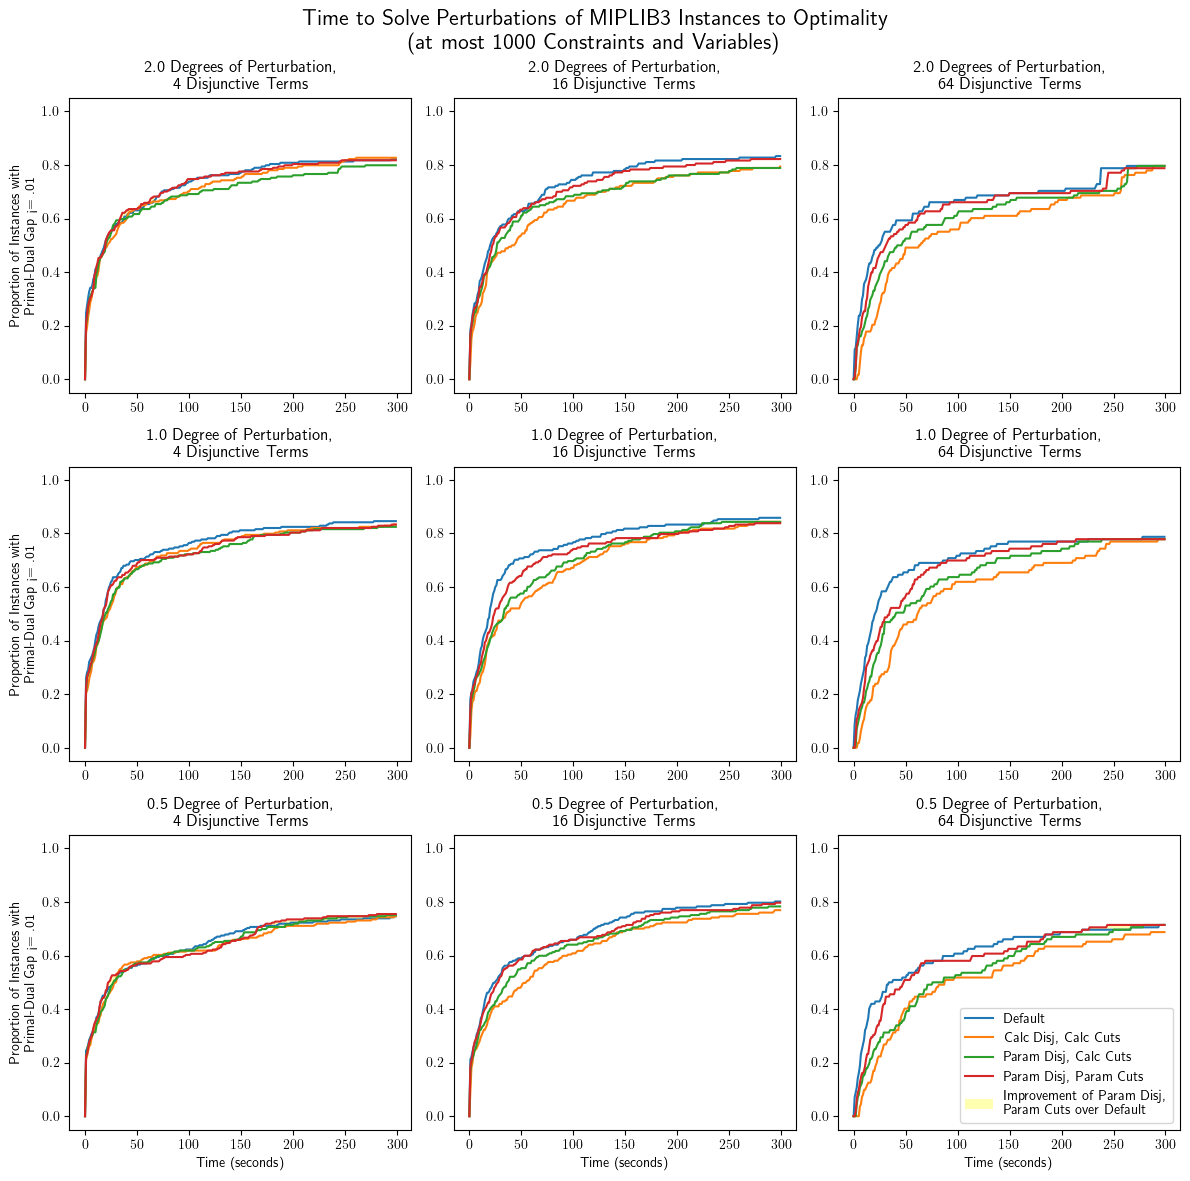

In [44]:
make_plots(time_df, "terminationTime", show_all=True)

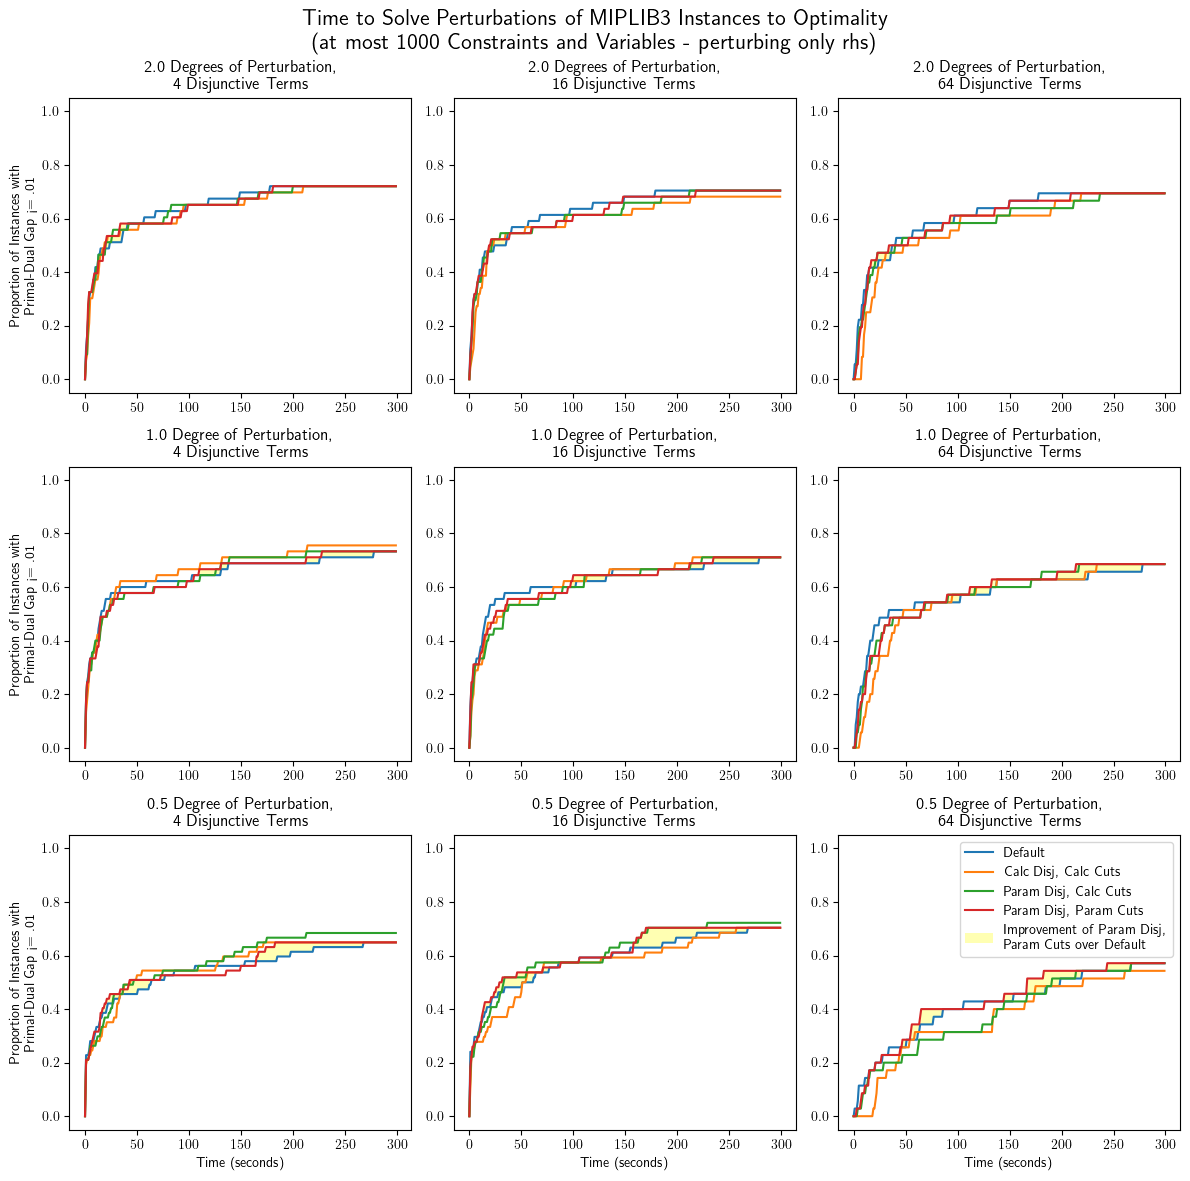

In [45]:
make_plots(time_df, "terminationTime", show_all=True, perturbation="rhs")

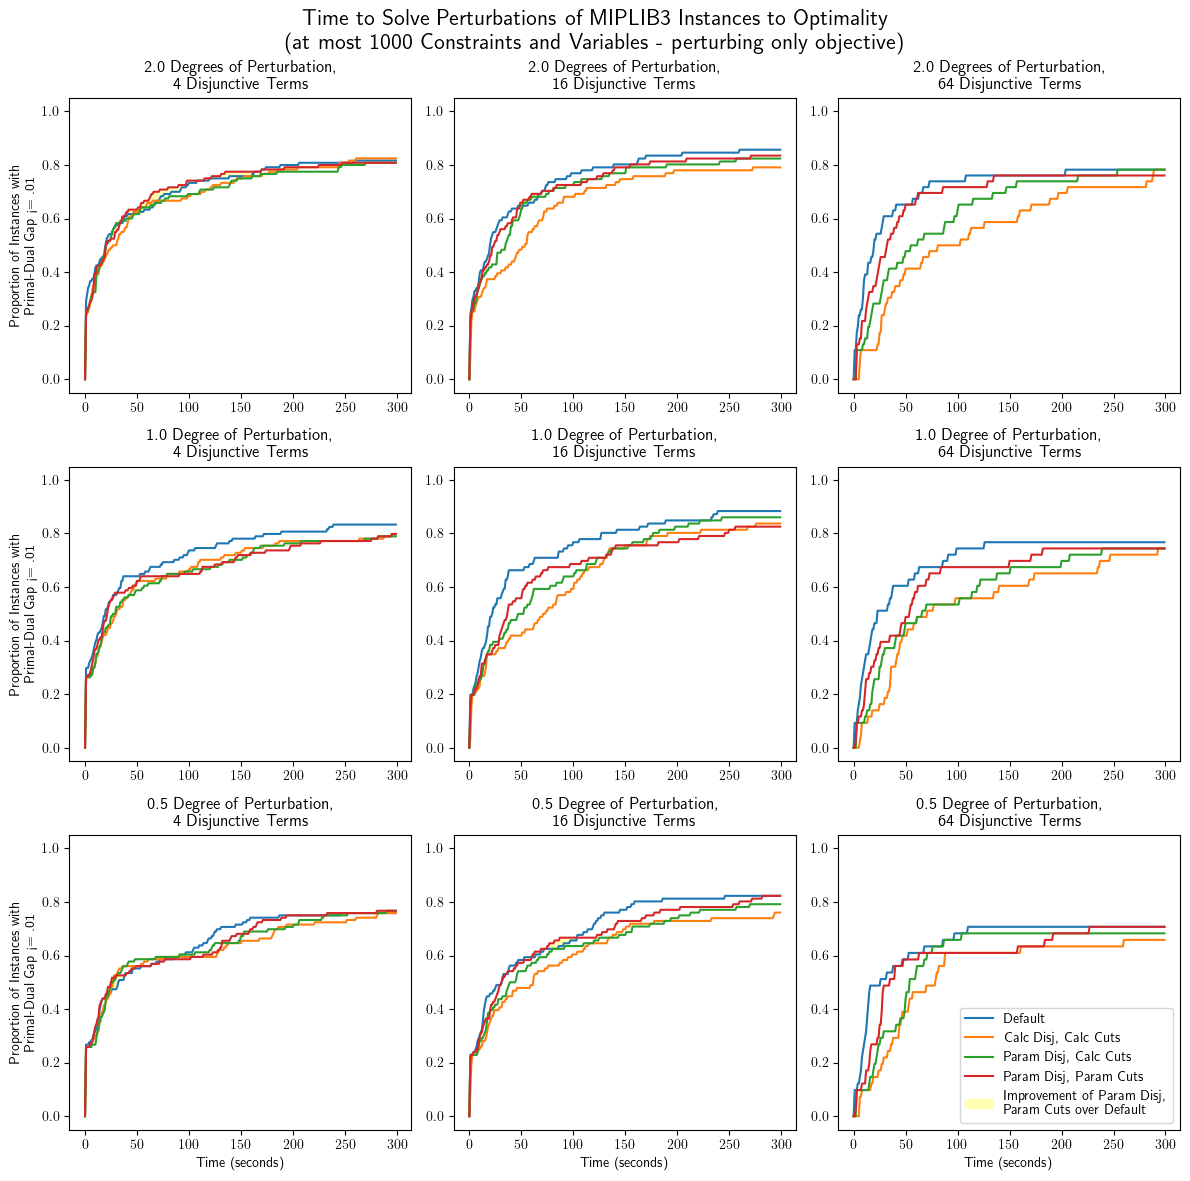

In [46]:
make_plots(time_df, "terminationTime", show_all=True, perturbation="objective")

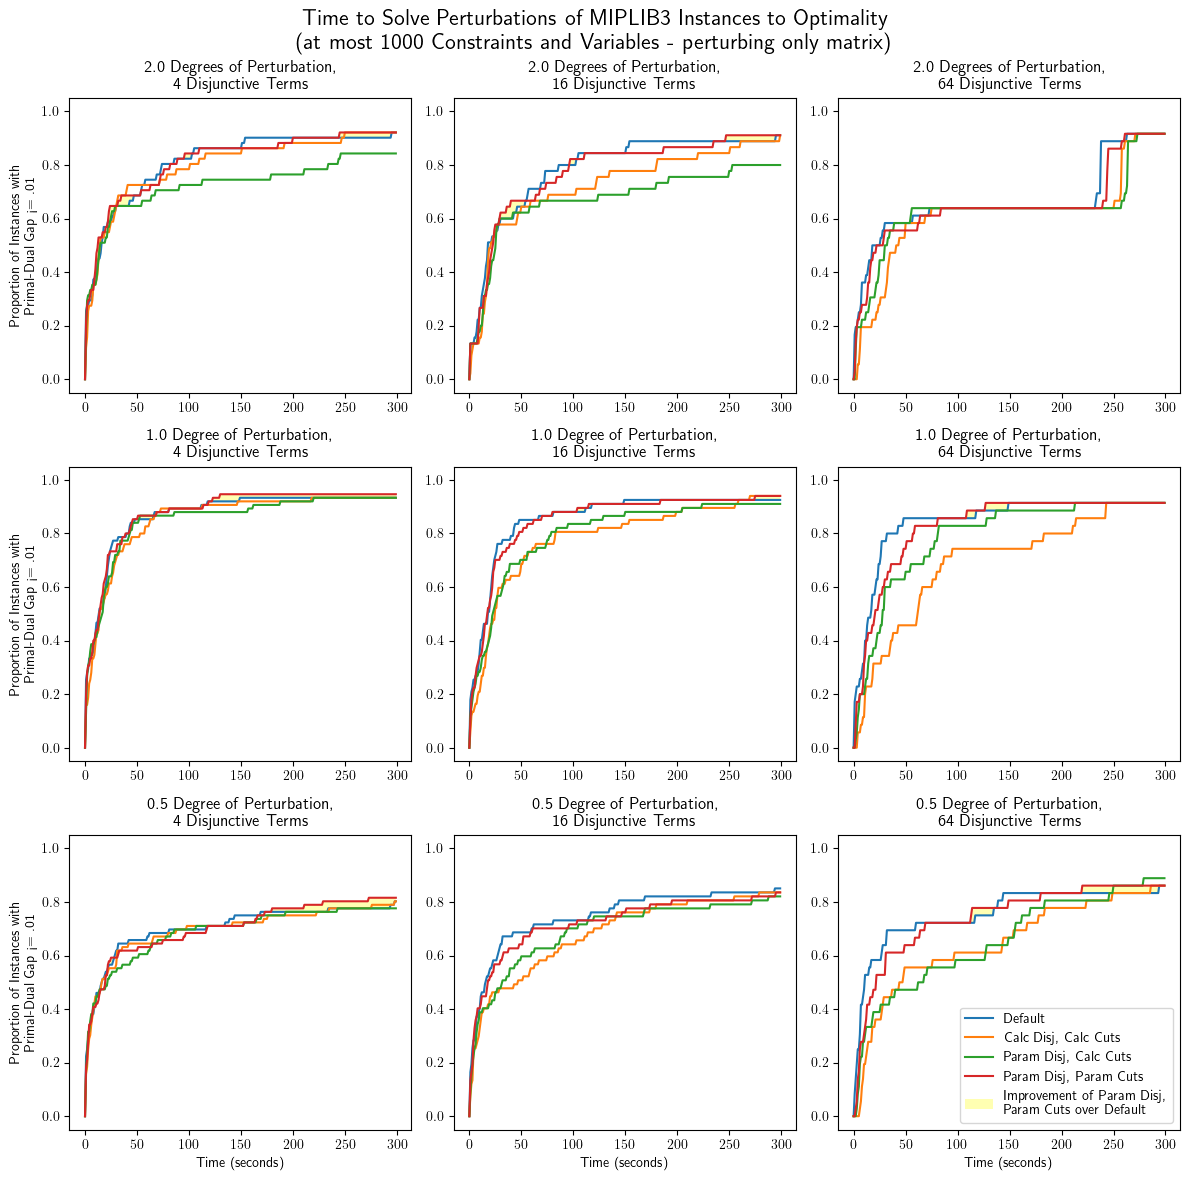

In [47]:
make_plots(time_df, "terminationTime", show_all=True, perturbation="matrix")

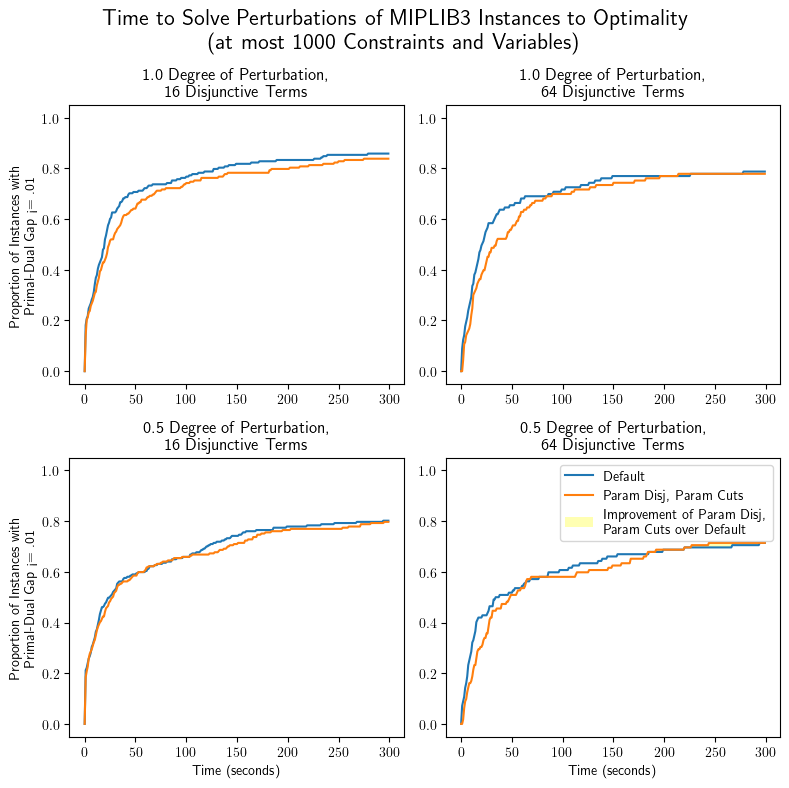

In [48]:
make_plots(time_df, "terminationTime", dim=2)

# Make node table

In [49]:
# additional filtering for dataframe on nodes processed
fields = ["nodes New", "nodes Old", "nodes Farkas",
          "nodes None"]
node_df = df.loc[mask, group_cols + id_cols + fields]
for f in fields:
    node_df[f] = node_df[f] / 1000

# define aggregating operations
aggregations = {f: "mean" for f in fields}
aggregations["instance"] = "nunique"
aggregations["instanceIndex"] = "count"

# get gap closed by degree and term
out = node_df.groupby(["degree", "terms"]).agg(aggregations).reset_index()
out.to_csv(os.path.join(out_fldr, "node.csv"), index=False, mode="w")
out

,degree,terms,nodes New,nodes Old,nodes Farkas,nodes None,instance,instanceIndex
0,0.5,4,18.104992,19.327337,20.337365,17.190699,16,249
1,0.5,16,13.589912,13.859290,14.812645,13.954470,16,217
2,0.5,64,14.654643,15.635286,16.362330,17.117223,11,112
3,1.0,4,12.819034,14.644103,14.771175,12.597868,19,234
4,1.0,16,11.916955,12.248955,13.245429,12.629682,16,198
5,1.0,64,12.066212,12.100398,14.578106,13.778982,13,113
6,2.0,4,14.098164,14.772126,14.778229,12.781224,19,214
7,2.0,16,12.592794,12.112506,12.945939,12.593317,16,180
8,2.0,64,13.057915,14.022280,14.620000,14.937576,14,118


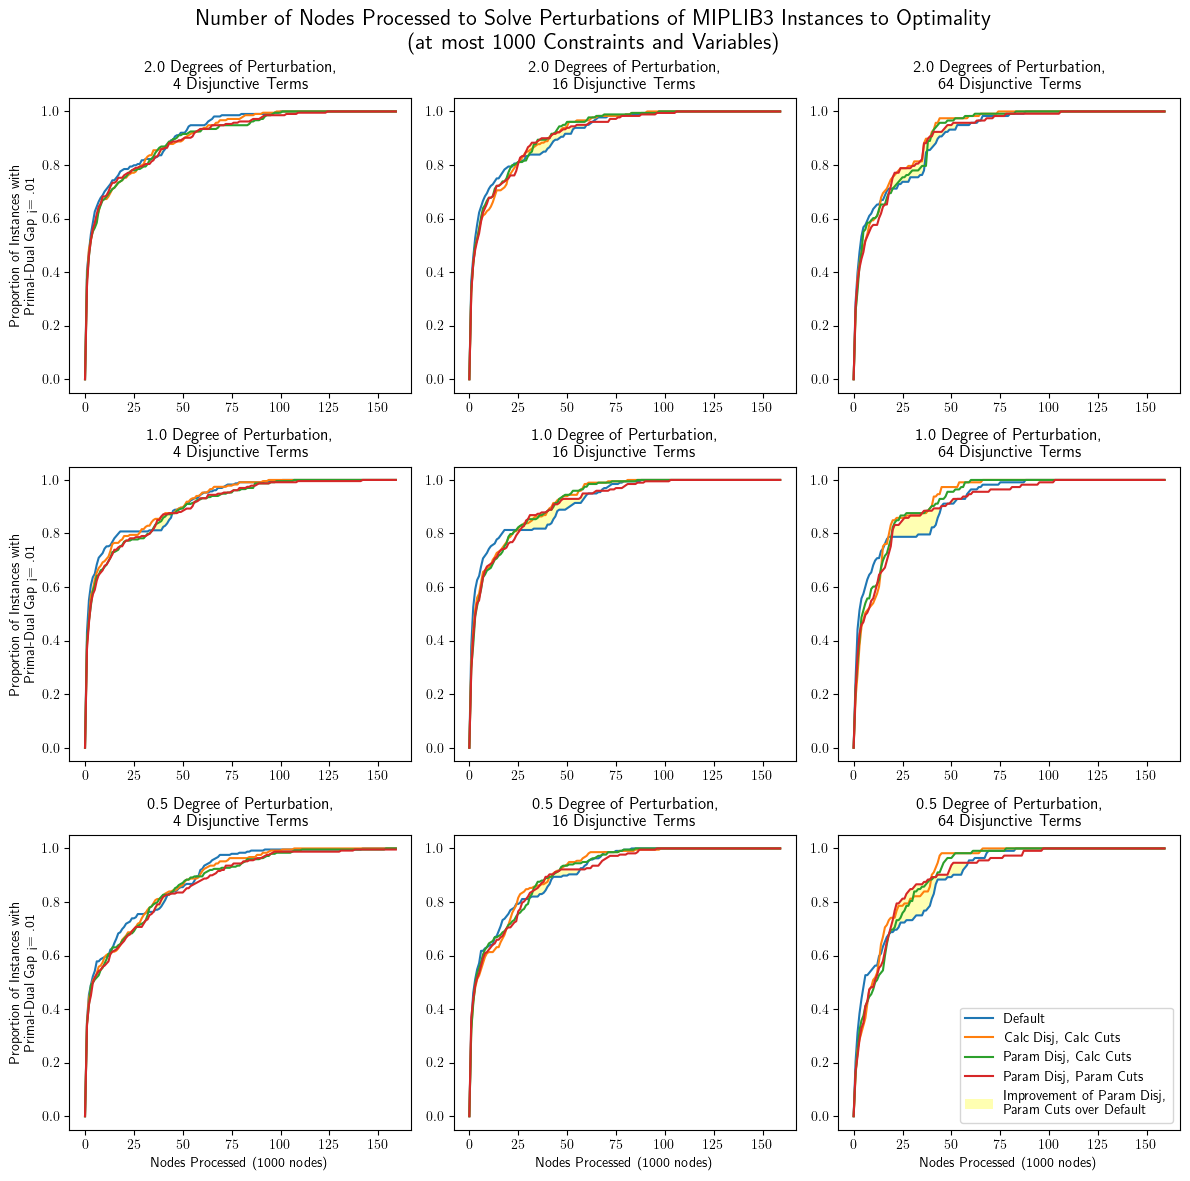

In [50]:
make_plots(node_df, "nodes", show_all=True)

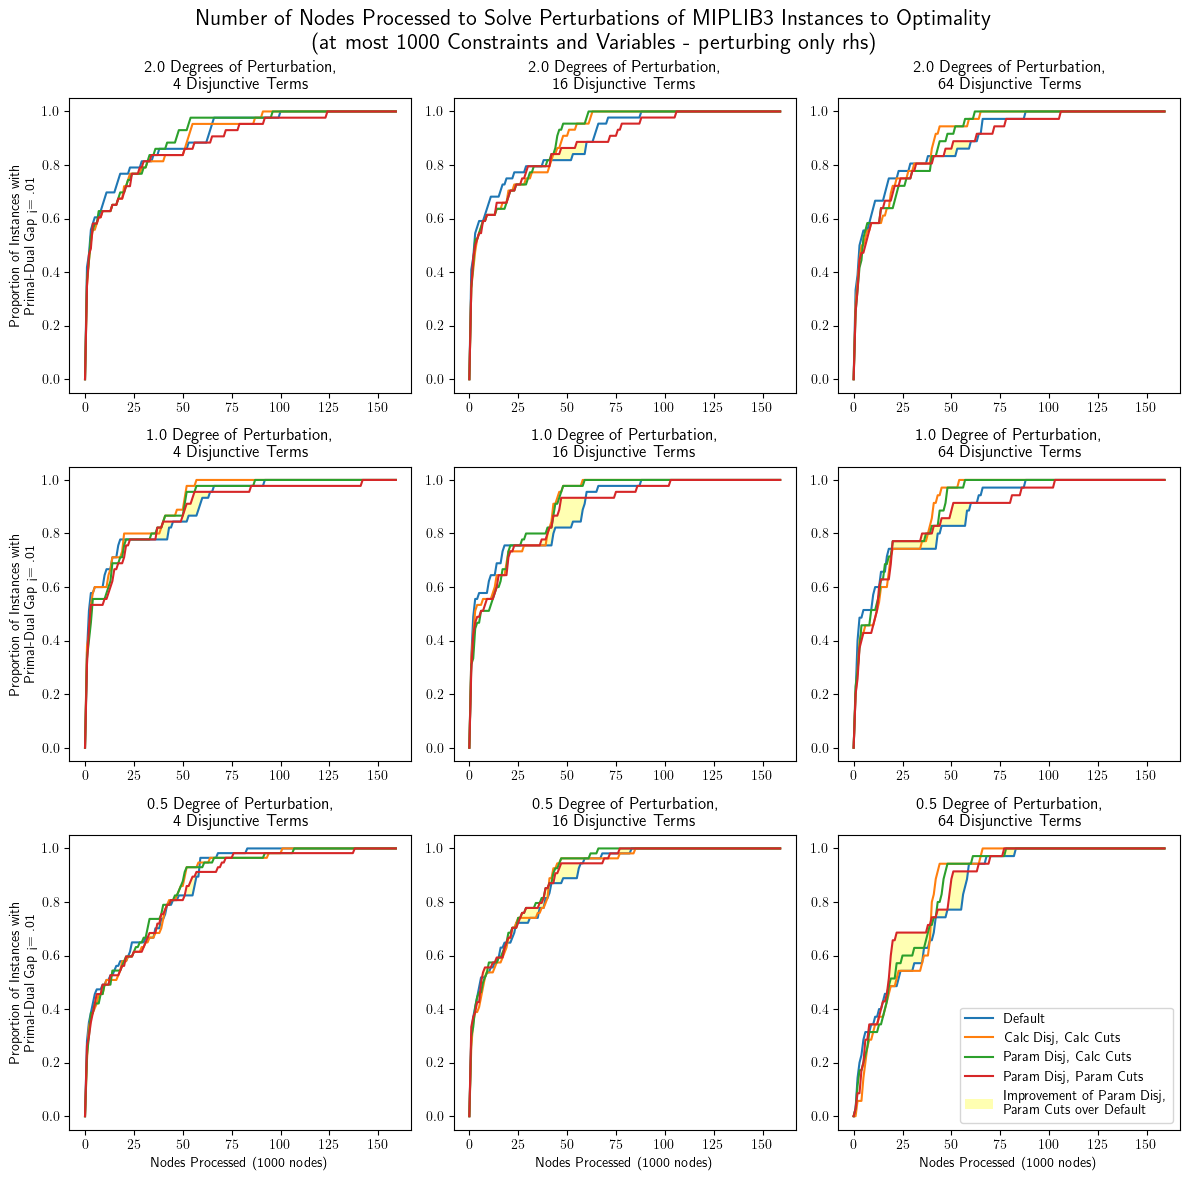

In [66]:
make_plots(node_df, "nodes", show_all=True, perturbation="rhs")

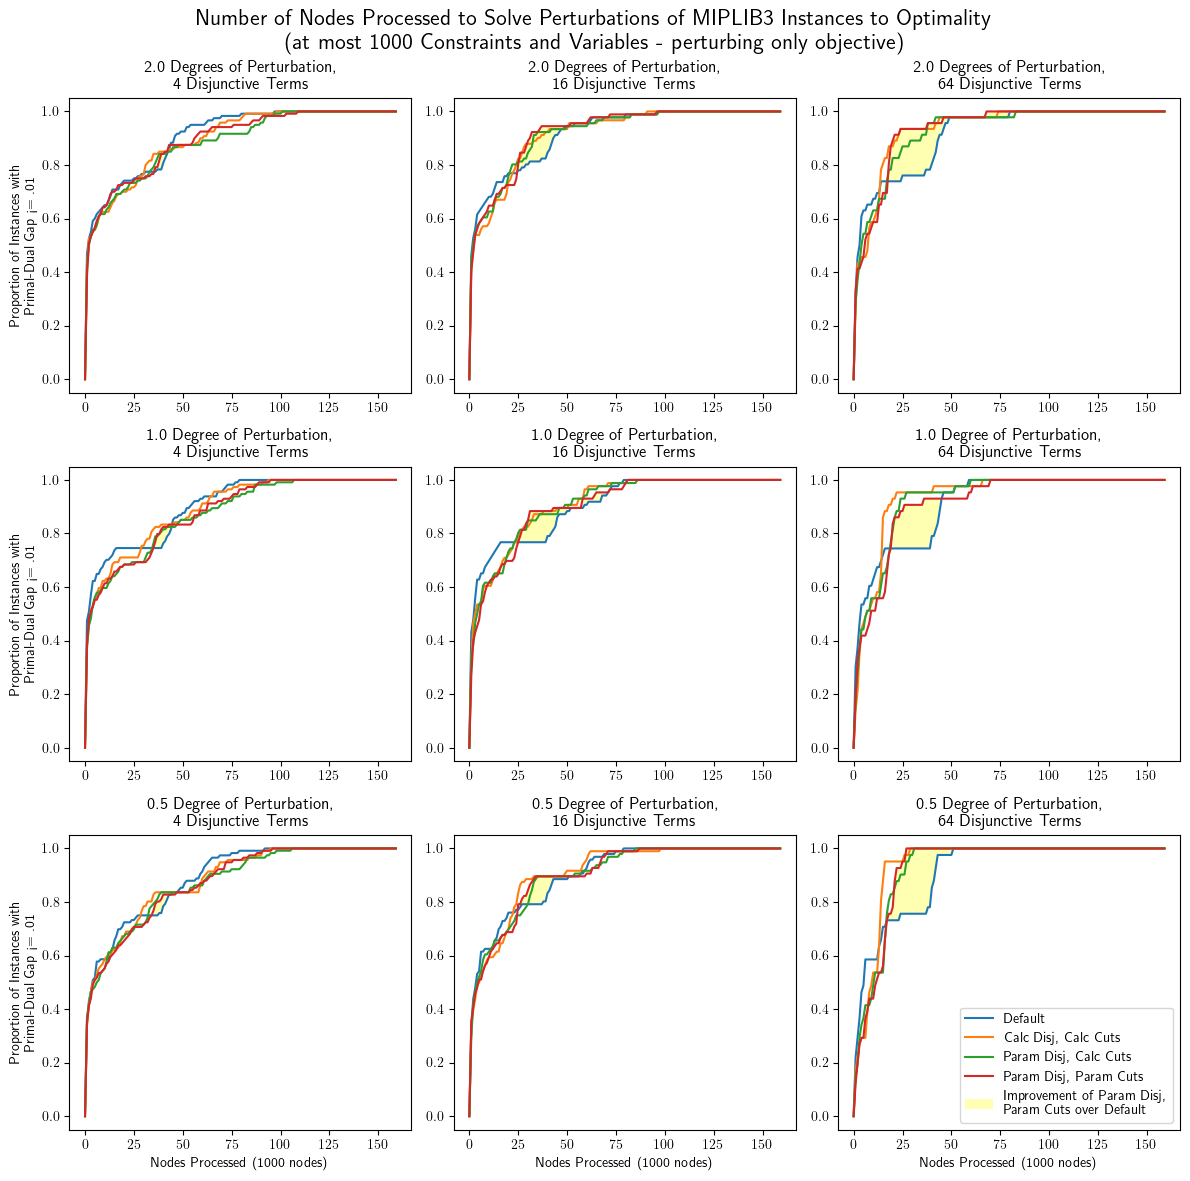

In [67]:
make_plots(node_df, "nodes", show_all=True, perturbation="objective")

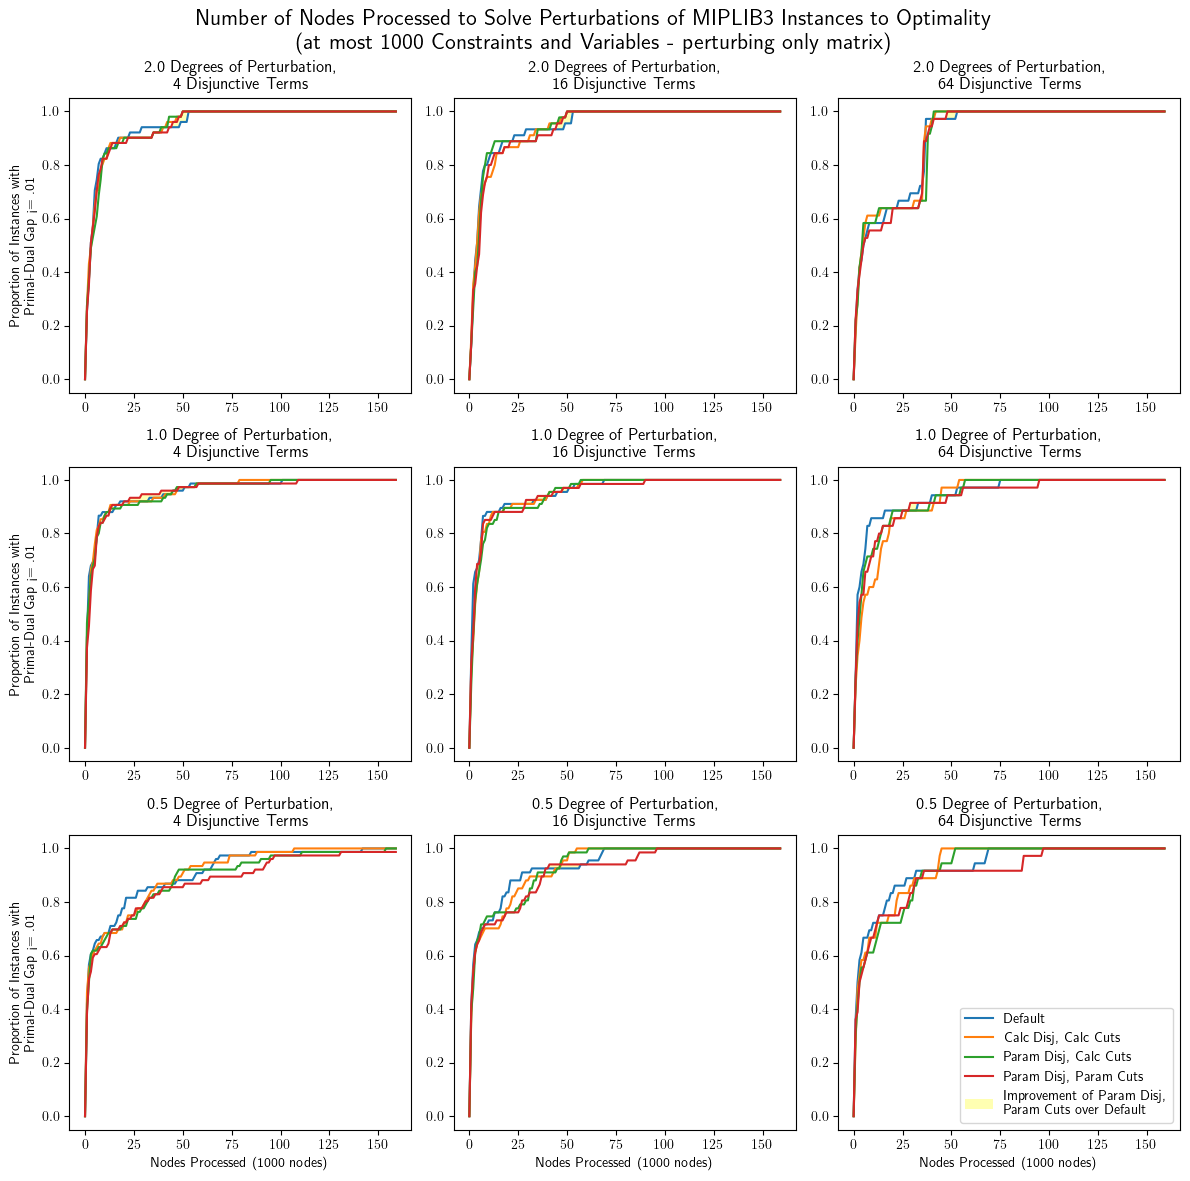

In [68]:
make_plots(node_df, "nodes", show_all=True, perturbation="matrix")

# Make iteration table

In [58]:
# additional filtering for dataframe on nodes processed
fields = ["iterations New", "iterations Old",
          "iterations Farkas", "iterations None"]
iteration_df = df.loc[mask, group_cols + id_cols + fields]
for f in fields:
    iteration_df[f] = iteration_df[f] / 1000

# define aggregating operations
aggregations = {f: "mean" for f in fields}
aggregations["instance"] = "nunique"
aggregations["instanceIndex"] = "count"

# get gap closed by degree and term
out = iteration_df.groupby(["degree", "terms"]).agg(aggregations).reset_index()
out.to_csv(os.path.join(out_fldr, "iteration.csv"), index=False, mode="w")
out

,degree,terms,iterations New,iterations Old,iterations Farkas,iterations None,instance,instanceIndex
0,0.5,4,106.830530,109.970225,117.318181,114.341554,16,249
1,0.5,16,82.623041,84.101682,91.490442,93.664488,16,217
2,0.5,64,83.634777,94.546821,99.846357,112.707071,11,112
3,1.0,4,69.907256,80.606303,80.677949,75.246551,19,234
4,1.0,16,63.506005,71.611510,77.245455,72.552702,16,198
5,1.0,64,65.409487,67.135159,78.716956,81.718062,13,113
6,2.0,4,77.289005,80.157481,81.164019,81.194098,19,214
7,2.0,16,73.242500,71.305617,76.891128,79.322861,16,180
8,2.0,64,82.298051,88.608102,92.140966,101.170381,14,118


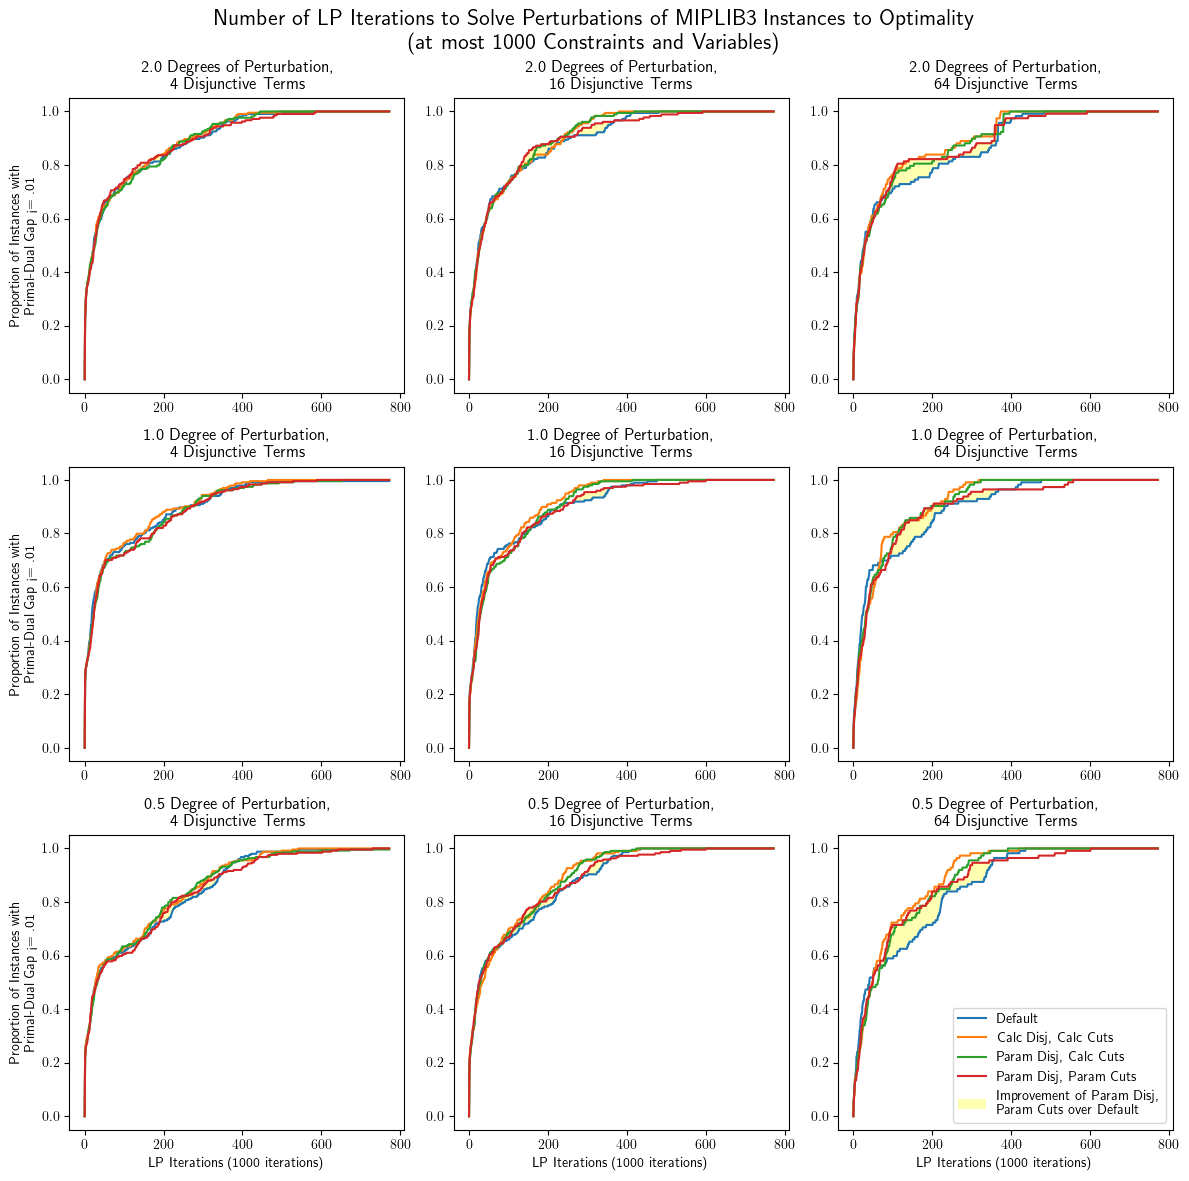

In [59]:
make_plots(iteration_df, "iterations", show_all=True)

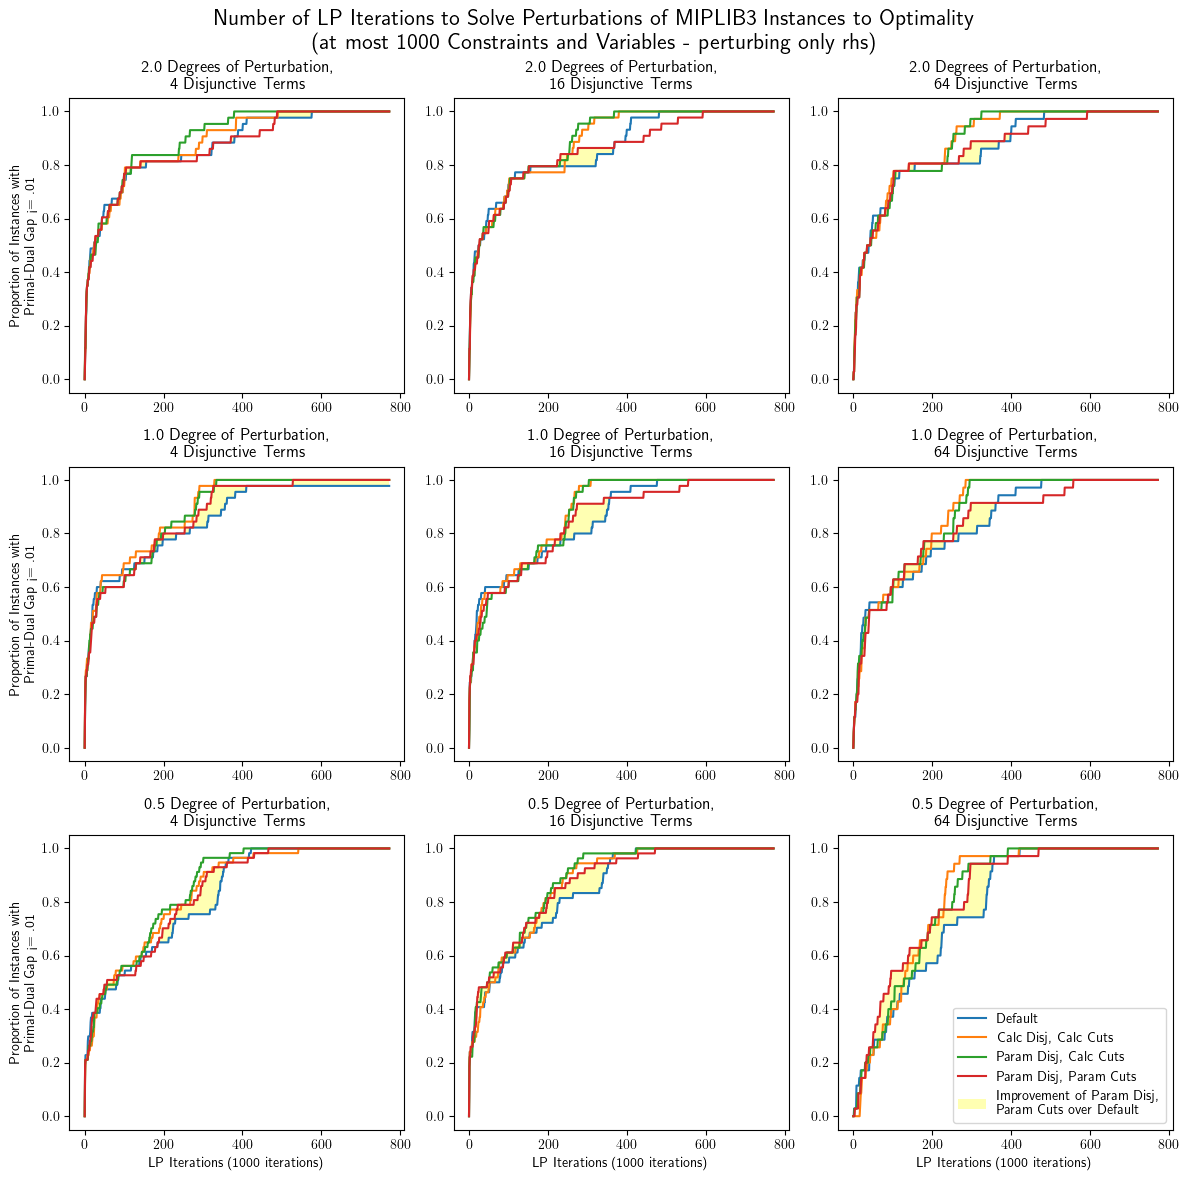

In [69]:
make_plots(iteration_df, "iterations", show_all=True, perturbation="rhs")

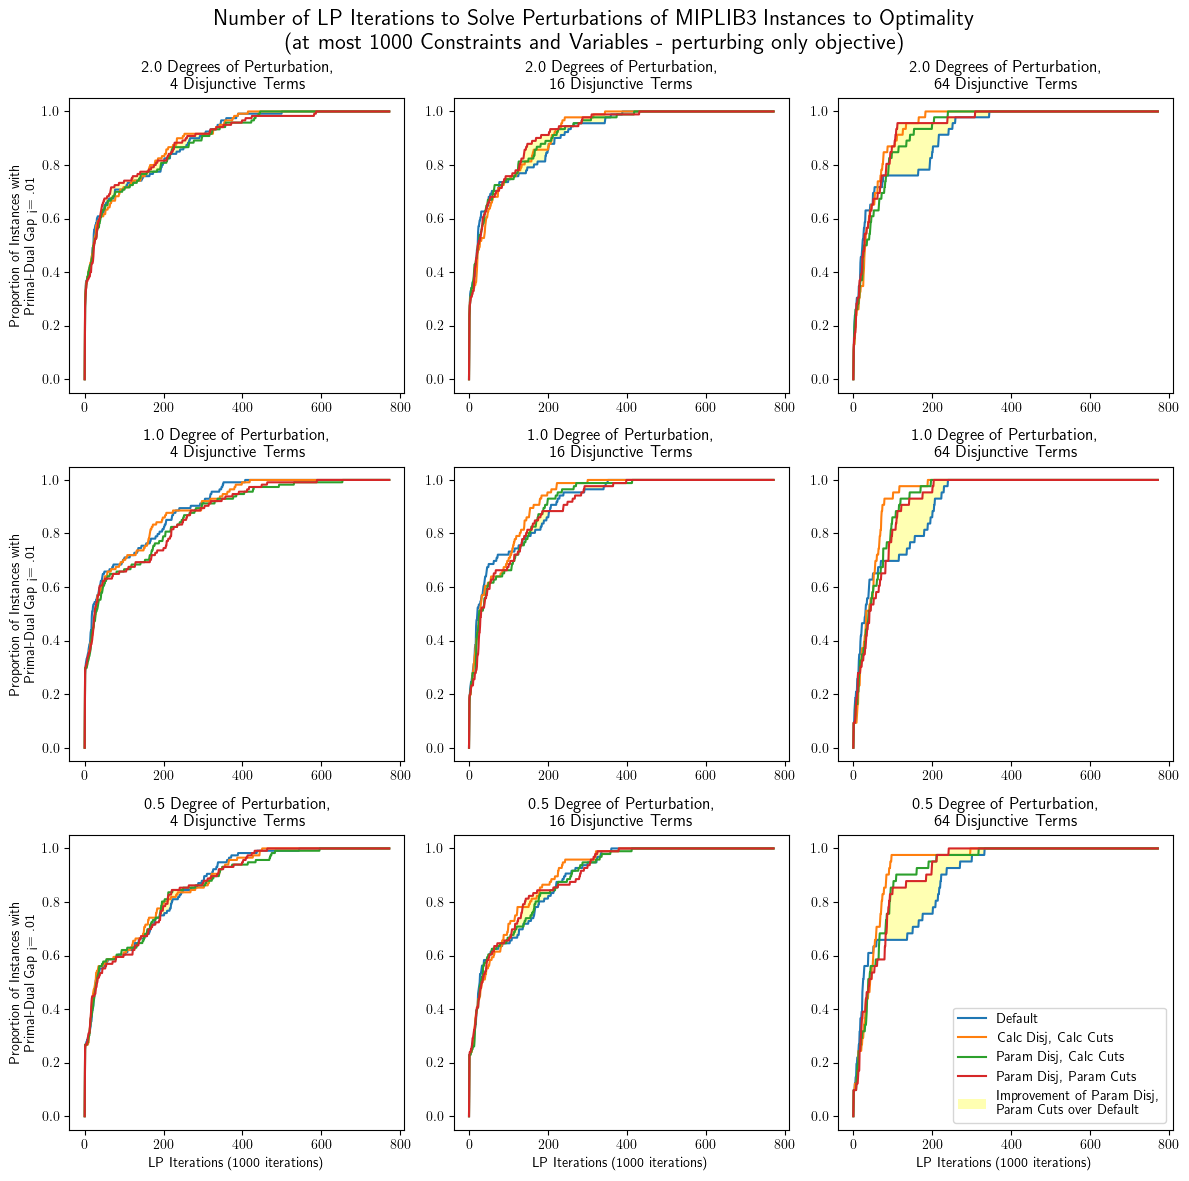

In [70]:
make_plots(iteration_df, "iterations", show_all=True, perturbation="objective")

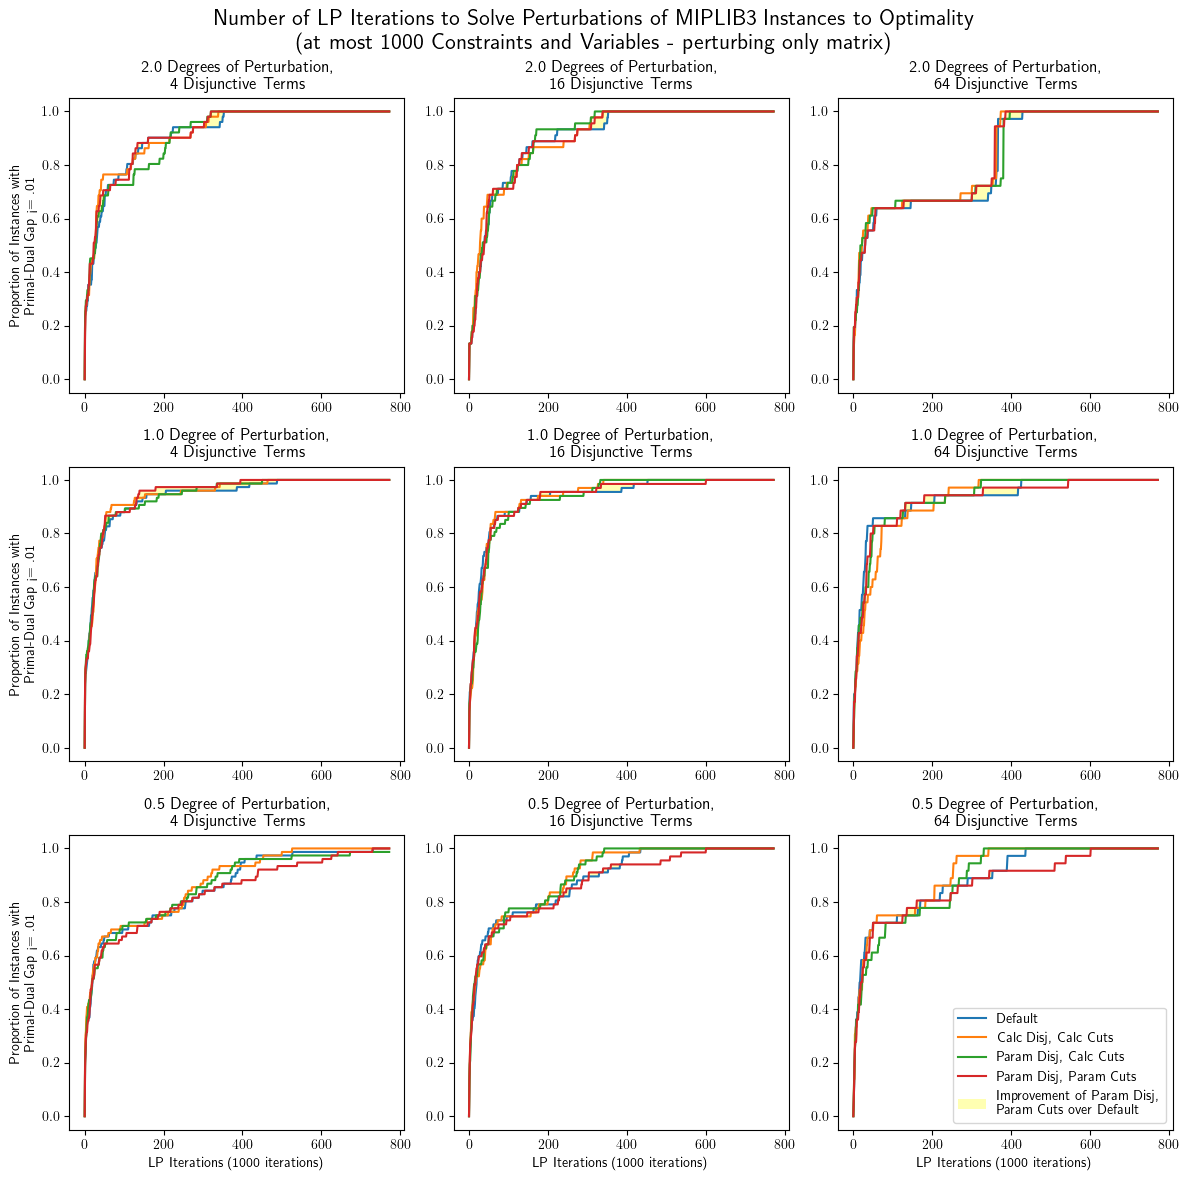

In [71]:
make_plots(iteration_df, "iterations", show_all=True, perturbation="matrix")